In [32]:
# ==============
# 1. Polynomial Regressiong Initial Learning
# 1. 多项式来源于线性回归中,在单个特征值x的基础上，添加x**2 平方项后增一个对应的feature值后衍生出来的
#

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
# data preparation
DATA_SIZE = 200 
x = np.random.uniform(-3,3,size = DATA_SIZE)
X = x.reshape(-1,1)  # M*1  - 1 列
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,DATA_SIZE)

In [23]:
#x.shape
#y.shape = (1000,1)

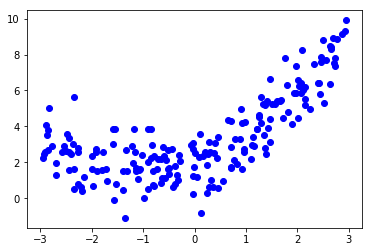

In [24]:
plt.scatter(X,y,color ='b')
plt.show()

### 1.线性回归模型

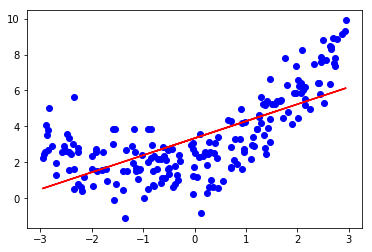

In [25]:
from sklearn.linear_model import LinearRegression
linear_clf = LinearRegression()
linear_clf.fit(X,y)
y_prediction = linear_clf.predict(X)

# plot the lineaer model
plt.scatter(X,y,color = 'b')
plt.plot(X,y_prediction,color = 'r')
plt.show()

### 2.引入多项式回归模型 - 添加一个特征项:x**2

In [26]:
Ploy_X2 = np.hstack([X, (X**2)])
Ploy_X2.shape

(200, 2)

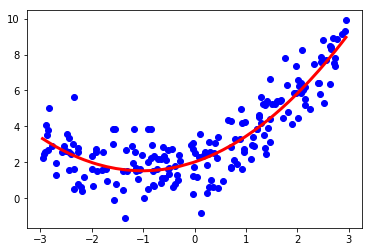

In [27]:
linear_clf.fit(Ploy_X2,y)
Ploy_y2Prediction = linear_clf.predict(Ploy_X2)
plt.scatter(X,y,color = 'blue')
plt.plot(np.sort(x),Ploy_y2Prediction[np.argsort(x)],linewidth = 3,color = 'red')
plt.show()

### 2.1 看一下拟合后的数据的参数跟原来定制好的参数大小

In [28]:
# y = 0.5 * x**2 + x + 2 + np.random.normal(-1,1,DATA_SIZE)
print("linear_clf.coef_的第一个系数是：",linear_clf.coef_[1],"逼近0.5")

linear_clf.coef_的第一个系数是： 0.47362008752642587 逼近0.5


In [29]:
print("linear_clf.coef_的第二个系数是：",linear_clf.coef_[0],"逼近1.0")

linear_clf.coef_的第二个系数是： 0.9616416293296796 逼近1.0


In [34]:
print("linear_clf.interceft_的系数是常数项：",linear_clf.intercept_,"逼近2.0")

linear_clf.interceft_的系数是常数项： 2.022662798561557 逼近2.0


### 3 sklearn 中的Polynomialfeature - 看看多项式的作用
0.对于degree = 1, 计算的是 x1,x2,C常数
1.对于degree = 2,计算的是 (x1)**2,(x2)**2,x1*x2 的情况
2.对于degree = 3,计算的是 (x1)**3,(x2)**3,(x1)**2*x2, (x2)**2*x1

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly = PolynomialFeatures(degree = 3)
poly.fit(X)
X2   = poly.transform(X)


In [40]:
X[0:4,:]

array([[-0.73632784],
       [-0.43328951],
       [-1.35441369],
       [-2.21863157]])

In [42]:
X2[0:4,:]  # degree = 3, 1,x,x**2,x**3 的显示顺序     # degree = 2, 1,x,x**2 

array([[  1.        ,  -0.73632784,   0.54217869,  -0.39922126],
       [  1.        ,  -0.43328951,   0.1877398 ,  -0.08134568],
       [  1.        ,  -1.35441369,   1.83443644,  -2.48458582],
       [  1.        ,  -2.21863157,   4.92232603, -10.92082792]])

In [51]:
# fit model
from sklearn.linear_model import LinearRegression
linear_clf = LinearRegression()
linear_clf.fit(X2,y)
y2_predict =linear_clf.predict(X2)

### Note: List里面存放的数据类型可以不一样，array里面存放的数据类型要一样

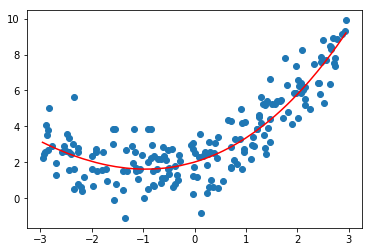

In [58]:
plt.scatter(x,y)
plt.plot(np.sort(x),y2_predict[np.argsort(x)],color = 'r')  # np.sort(x) 将x 从小到大排列生成一个array
plt.show()

### 3.1 通过Pipeline将Polynomial and LinearRegression Classifier 串接起来,形成多项式分类器

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
poly_reg =  Pipeline([
    ('standardscaler',StandardScaler()),
    ('polynomial',PolynomialFeatures()),
    ('linearregression',LinearRegression())
])

In [75]:
poly_reg.fit(X,y)
poly_reg_prediction = poly_reg.predict(X)

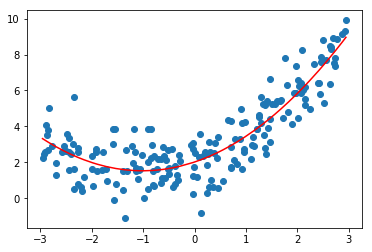

In [76]:
plt.scatter(x,y)
plt.plot(np.sort(x),poly_reg_prediction[np.argsort(x)],color = 'r')
plt.show()

### 4.UnderFitting and OverFitting
利用mean_squared_error 表示均方误差 

In [79]:
from sklearn.metrics import mean_squared_error

In [82]:
def PolynomialFeatureFunction(degree):
    return Pipeline([
        ('standard',StandardScaler()),
        ('polynomial',PolynomialFeatures(degree = degree)),
        ('linear_regression',LinearRegression()),
    ])

In [141]:
# degree = 2
ploy2_clf  = PolynomialFeatureFunction(degree = 1)
ploy10_clf = PolynomialFeatureFunction(degree = 10)
ploy20_clf = PolynomialFeatureFunction(degree = 20)
ploy100_clf = PolynomialFeatureFunction(degree = 100)

In [142]:
# fit degree = 2 
ploy2_clf.fit(X,y)
ploy2_prediction =ploy2_clf.predict(X)
meanerror2 = mean_squared_error(y,ploy2_prediction)

In [143]:
# fit degree  = 10
ploy10_clf.fit(X,y)
ploy10_prediction =ploy10_clf.predict(X)
meanerror10 = mean_squared_error(y,ploy10_prediction)

In [144]:
# fit degree  = 20
ploy20_clf.fit(X,y)
ploy20_prediction =ploy20_clf.predict(X)
meanerror20 = mean_squared_error(y,ploy20_prediction)

In [145]:
# fit degree  = 100
ploy100_clf.fit(X,y)
ploy100_prediction =ploy100_clf.predict(X)
meanerror100 = mean_squared_error(y,ploy100_prediction)

### 4.1 输出不同维度的值，观察欠拟合与过拟合的现象

In [146]:
print("degree = 2 ,mean squared errors: ", meanerror2)
print("degree = 10 ,mean squared errors: ", meanerror10)
print("degree = 20 ,mean squared errors: ", meanerror20)
print("degree = 100 ,mean squared errors: ", meanerror100)

degree = 2 ,mean squared errors:  2.6876218779386303
degree = 10 ,mean squared errors:  1.0736613087665203
degree = 20 ,mean squared errors:  1.030800279889183
degree = 100 ,mean squared errors:  2.9517901194675393


红色曲线degree = 1 欠拟合
黄色曲线degree = 10 过拟合


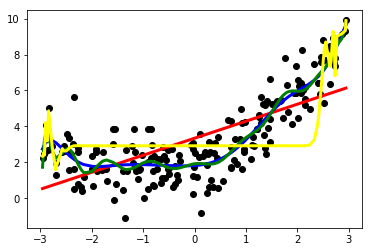

In [149]:
print("红色曲线degree = 1 欠拟合")
print("黄色曲线degree = 10 过拟合")
plt.scatter(x,y,color= 'black')
plt.plot(np.sort(x),ploy2_prediction[np.argsort(x)],linewidth = 3, color = 'r')
plt.plot(np.sort(x),ploy10_prediction[np.argsort(x)],linewidth = 3,color = 'b')
plt.plot(np.sort(x),ploy20_prediction[np.argsort(x)],linewidth = 3,color = 'green')
plt.plot(np.sort(x),ploy100_prediction[np.argsort(x)],linewidth = 3,color = 'yellow')
plt.show()
